In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
scantronMath_38_encoded_df = pd.read_csv('../dataframes/scantronMath_38_encoded.csv')

In [3]:
scantronMath_38_encoded_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,False,True,False,False,False,0,0,0.957757,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,False,True,False,False,False,0,0,0.949346,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronMath,True,1.021622,False,False,False,False,False,True,False,False,False,0,0,0.990132,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,False,True,False,False,False,0,0,1.035514,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,False,True,False,False,False,0,0,0.934393,2,2,2,2,1,0,0,0,0


In [4]:
scantronMath_38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
school_Elementary A                bool
school_Elementary School B         bool
school_Elementary School E         bool
school_Elementary School F         bool
school_Intermediate School E       bool
school_Middle School A             bool
school_Middle School C             bool
school_Middle School D             bool
school_Middle School F             bool
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [5]:
#turning bools in one hot encoded rows to 0 and 1
scantronMath_38_encoded_df[scantronMath_38_encoded_df.select_dtypes(include=['bool']).columns] = scantronMath_38_encoded_df.select_dtypes(include=['bool']).astype(int)
scantronMath_38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int64
proficient_score                float64
school_Elementary A               int64
school_Elementary School B        int64
school_Elementary School E        int64
school_Elementary School F        int64
school_Intermediate School E      int64
school_Middle School A            int64
school_Middle School C            int64
school_Middle School D            int64
school_Middle School F            int64
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [6]:
scantronMath_38_encoded_df.isnull().sum()

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
school_Elementary A                0
school_Elementary School B         0
school_Elementary School E         0
school_Elementary School F         0
school_Intermediate School E       0
school_Middle School A             0
school_Middle School C             0
school_Middle School D             0
school_Middle School F             0
iready_math                        0
iready_reading                     0
past_proficient_score           5422
subject_math                       0
subject_reading                    0
subject_science                    0
subject_social-studies             0
subject_music                      0
subject_art                        0
subject_performing-arts            0
subject_phys-ed                    0
subject_career-prep                0
dtype: int64

In [7]:
#dropping rows that are missing past proficient score
scantronMath_38_encoded_df = scantronMath_38_encoded_df.dropna(subset=['past_proficient_score'])
print(scantronMath_38_encoded_df.isnull().sum()) 

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
school_Elementary A             0
school_Elementary School B      0
school_Elementary School E      0
school_Elementary School F      0
school_Intermediate School E    0
school_Middle School A          0
school_Middle School C          0
school_Middle School D          0
school_Middle School F          0
iready_math                     0
iready_reading                  0
past_proficient_score           0
subject_math                    0
subject_reading                 0
subject_science                 0
subject_social-studies          0
subject_music                   0
subject_art                     0
subject_performing-arts         0
subject_phys-ed                 0
subject_career-prep             0
dtype: int64


Training

In [8]:
y_Math = scantronMath_38_encoded_df['proficient_score']
X_Math= scantronMath_38_encoded_df.drop(['proficient_score','is_proficient','studentId','dataSource','level'],  axis=1)
print("Number of examples: " + str(X_Math.shape[0]))
X_train_Math,X_test_Math, y_train_Math,y_test_Math = train_test_split(X_Math,y_Math, test_size=0.20, random_state=123)
print(X_train_Math.shape)
print(X_test_Math.shape)

Number of examples: 15149
(12119, 21)
(3030, 21)


In [9]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_values = [8,12,25,32]
min_samples_leaf_values = [4,5,8,10]
param_grid = {'max_depth' : list(max_depth_values), 'min_samples_leaf' : list(min_samples_leaf_values)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor_Math = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid_Math = GridSearchCV(dt_regressor_Math, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search_Math = dt_grid_Math.fit(X_train_Math, y_train_Math)

print("Done")
dt_best_params_Math = dt_grid_search_Math.best_params_

dt_best_params_Math

Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 10}

In [10]:
dt_model_Math = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_model_Math.fit(X_train_Math,y_train_Math)

#testing model on the X_test
y_dt_pred_Math = dt_model_Math.predict(X_test_Math)
dt_rmse_Math = mean_squared_error(y_test_Math,y_dt_pred_Math,squared=False)
dt_r2_Math= r2_score(y_test_Math,y_dt_pred_Math)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_Math_bool = y_dt_pred_Math >= threshold
y_test_Math_bool = y_test_Math >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_Math_bool, y_pred_Math_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse_Math))
print('[DT] R2: {0}'.format(dt_r2_Math))

#extracting from classification report for bar graph
report = classification_report(y_test_Math_bool, y_pred_Math_bool, output_dict=True)

# Extract accuracy from the report dictionary
accuracy = report['accuracy']

# Extract other metrics you want to plot, like precision and recall for the "True" class
precision_true = report['True']['precision']
recall_true = report['True']['recall']

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.94      0.90      2078
        True       0.84      0.70      0.76       952

    accuracy                           0.86      3030
   macro avg       0.86      0.82      0.83      3030
weighted avg       0.86      0.86      0.86      3030

[DT] Root Mean Squared Error: 0.04933051818827042
[DT] R2: 0.5697628055868963


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
#looking at the micro score
micro_f1 = f1_score(y_test_Math_bool, y_pred_Math_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.8633663366336634


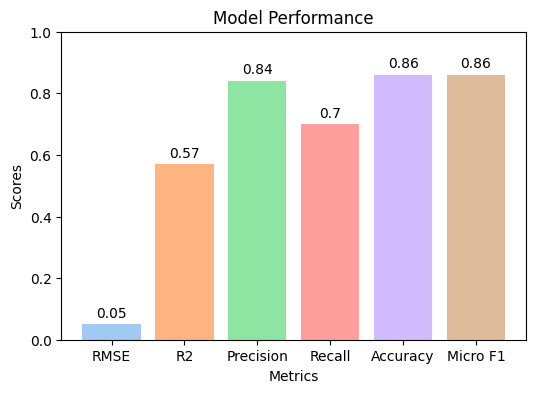

In [12]:
metrics = ['RMSE', 'R2', 'Precision', 'Recall', 'Accuracy', 'Micro F1']
values = [dt_rmse_Math,dt_r2_Math,precision_true,recall_true,accuracy,micro_f1]

rounded_values = [round(value, 2) for value in values]

# Get a pastel color palette
pastel_colors = sns.color_palette("pastel", len(metrics))

# Plot the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(metrics, rounded_values, color=pastel_colors)

# Add labels directly on top of bars
ax.bar_label(bars, padding=3, fontsize=10)  # padding adds space between bar and label
ax.set_ylim(0, 1)  # This will ensure the y-axis goes from 0 to 1

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance')

# Display the plot
plt.show()

Feature Importance 

In [13]:
importances = dt_model_Math.feature_importances_
feature_names = X_train_Math.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                         Feature  Importance
11         past_proficient_score    0.976214
19               subject_phys-ed    0.008057
15        subject_social-studies    0.003661
2     school_Elementary School E    0.002507
7         school_Middle School D    0.002346
3     school_Elementary School F    0.001688
13               subject_reading    0.001432
0            school_Elementary A    0.001128
16                 subject_music    0.000819
8         school_Middle School F    0.000812
14               subject_science    0.000421
10                iready_reading    0.000247
6         school_Middle School C    0.000226
12                  subject_math    0.000194
9                    iready_math    0.000080
4   school_Intermediate School E    0.000065
5         school_Middle School A    0.000064
1     school_Elementary School B    0.000039
17                   subject_art    0.000000
18       subject_performing-arts    0.000000
20           subject_career-prep    0.000000


In [14]:
#top ten features
importance_df.head(10)

,Feature,Importance
11,past_proficient_score,0.976214
19,subject_phys-ed,0.008057
15,subject_social-studies,0.003661
2,school_Elementary School E,0.002507
7,school_Middle School D,0.002346
3,school_Elementary School F,0.001688
13,subject_reading,0.001432
0,school_Elementary A,0.001128
16,subject_music,0.000819
8,school_Middle School F,0.000812


SHAP

In [15]:
import shap

c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
explainer = shap.Explainer(dt_model_Math)
shap_test = explainer(X_test_Math)
shap_df = pd.DataFrame(shap_test.values, columns=shap_test.feature_names,
  index=X_test_Math.index)
# Fetch the importances
shap_df = shap_df.apply(np.abs).mean().sort_values(ascending=False)
print(shap_df)

past_proficient_score           0.046522
subject_social-studies          0.001387
subject_phys-ed                 0.000739
school_Middle School D          0.000494
school_Elementary School E      0.000472
subject_reading                 0.000450
school_Elementary School F      0.000322
school_Middle School F          0.000268
subject_science                 0.000151
school_Elementary A             0.000137
iready_reading                  0.000128
school_Middle School C          0.000107
subject_math                    0.000081
subject_music                   0.000080
iready_math                     0.000048
school_Intermediate School E    0.000040
school_Middle School A          0.000023
school_Elementary School B      0.000017
subject_art                     0.000000
subject_performing-arts         0.000000
subject_career-prep             0.000000
dtype: float64


<Axes: title={'center': 'Top 10 Important Features'}>

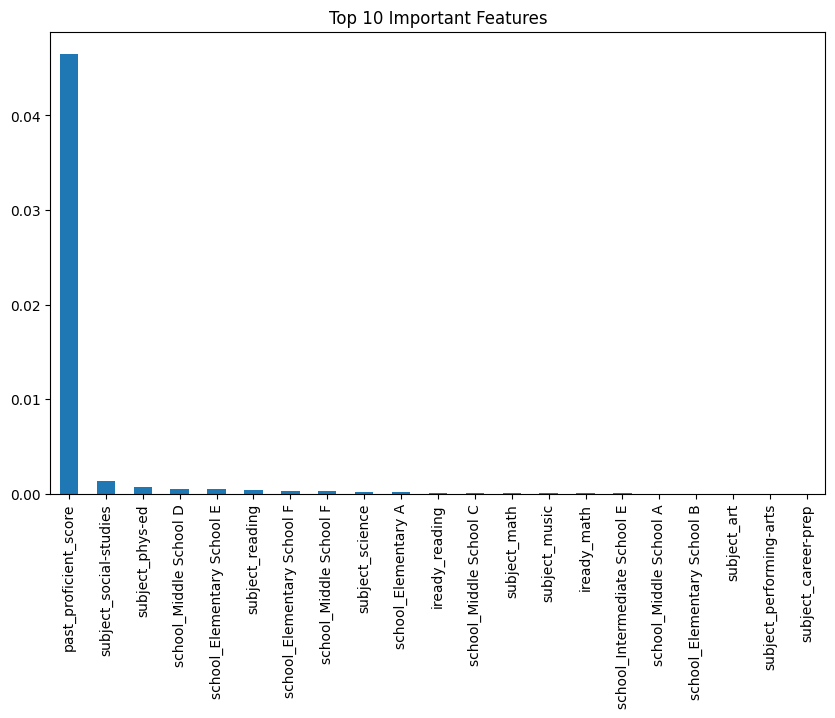

In [17]:
shap_df.head(25).plot(kind='bar', title='Top 10 Important Features', figsize=(10, 6))
